spefile module not found
netCDF4 module not found
EdfFile module not found
astropy module not found
olefile module not found
interp radius in USFFT: 3


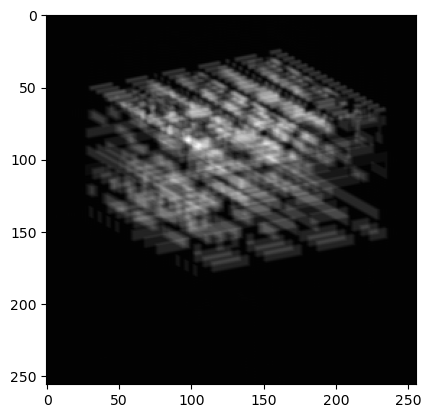

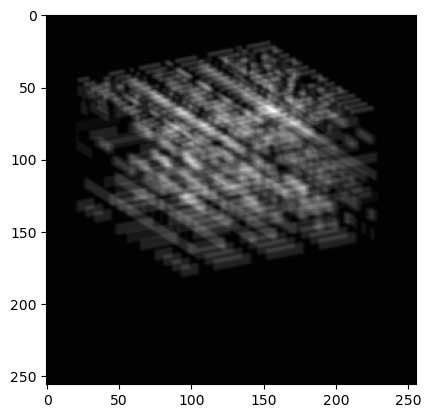

In [ ]:
import numpy as np
import lamcg as lcg
import matplotlib.pyplot as plt
import dxchange

n0 = 256
n1 = 256
n2 = 256
detw = 256
deth = 256
ntheta = 180
phi = np.pi/2-20/180*np.pi # pitch of the stage (90-20deg here)
alpha = 1/180*np.pi # roll of the stage
center = [4,0] # offseet from the middle in y and x (changing the rotation axis)

theta = np.linspace(0,2*np.pi,ntheta,endpoint=False).astype('float32')
f = -dxchange.read_tiff(f'delta-chip-{n0}.tiff')
f[f<0.8e-5]=0

with lcg.SolverLam(n0, n1, n2, detw, deth, ntheta, phi,alpha,center,1e-2) as slv:
    g = slv.fwd_lam(f,theta)

plt.imshow(g.real[ntheta//6],cmap='gray')
plt.show()
plt.imshow(g.real[ntheta//6+ntheta//2],cmap='gray')
plt.show()


In [2]:
phi_new = phi+1/180*np.pi
alpha_new = 0.0
center_new = [0,0]
theta_new = theta+0.2

with lcg.SolverLam(n0, n1, n2, detw, deth, ntheta, phi_new,alpha_new,center_new,1e-2) as slv:
    rec = slv.cg_lam(g, f*0, theta+0.2, 128, False)

interp radius in USFFT: 3


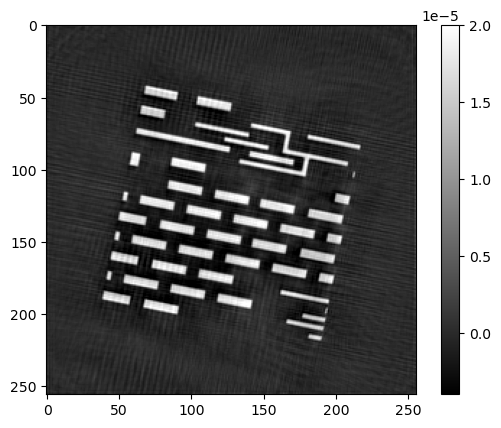

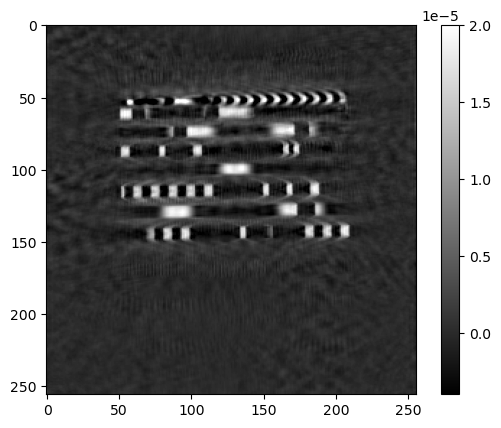

In [3]:
plt.imshow(rec.real[73],cmap='gray',vmax=2e-5,vmin=-4e-6)
plt.colorbar()
plt.show()
plt.imshow(rec.real[:,n0//2],cmap='gray',vmax=2e-5,vmin=-4e-6)
plt.colorbar()
plt.show()

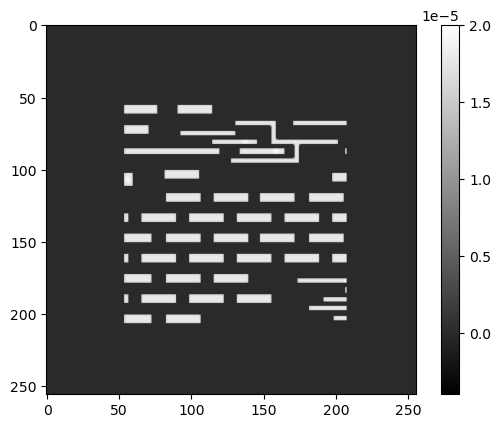

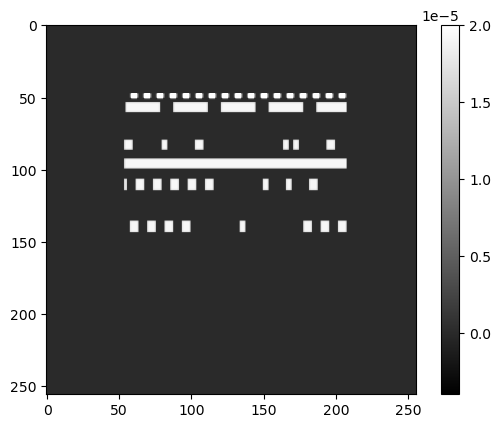

In [4]:
plt.imshow(f.real[73],cmap='gray',vmax=2e-5,vmin=-4e-6)
plt.colorbar()
plt.show()
plt.imshow(f.real[:,n0//2],cmap='gray',vmax=2e-5,vmin=-4e-6)
plt.colorbar()
plt.show()